In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy
from matplotlib import pyplot
import pandas
import scipy.stats

import calibr8

### Load data
For the calibration curve, we need pairs of independent (x) and dependent (y) variables.

In [3]:
data = pandas.DataFrame()
data['x'] = [2.9988000e+01, 1.2600000e+01, 5.2920000e+00, 2.2320000e+00, 9.5961600e-01,
 4.0320000e-01, 1.6934400e-01, 6.9192000e-02, 2.9748096e-02, 1.2499200e-02,
 5.2496640e-03, 2.1449520e-03, 2.6928000e+01, 1.1304000e+01, 4.7520000e+00,
 1.9800000e+00, 8.6169600e-01, 3.6172800e-01, 1.4731200e-01, 6.3360000e-02,
 2.6712576e-02, 1.1213568e-02, 4.7139840e-03, 1.9641600e-03, 2.4156000e+01,
 1.0152000e+01, 4.2480000e+00, 1.8000000e+00, 7.7299200e-01, 3.1471200e-01,
 1.3593600e-01, 5.5800000e-02, 2.3962752e-02, 1.0070784e-02, 4.2140160e-03,
 1.7298000e-03, 2.1672000e+01, 9.1080000e+00, 3.8160000e+00, 1.6200000e+00,
 6.9350400e-01, 2.8234800e-01, 1.2211200e-01, 5.0220000e-02, 2.1498624e-02,
 9.0351360e-03, 3.7854720e-03, 1.5568200e-03, 1.9440000e+01, 8.1720000e+00,
 3.4200000e+00, 1.4400000e+00, 6.2208000e-01, 2.5333200e-01, 1.0944000e-01,
 4.4640000e-02, 1.9284480e-02, 8.1066240e-03, 3.3926400e-03, 1.4284800e-03,
 1.7424000e+01, 7.3080000e+00, 3.0600000e+00, 1.2960000e+00, 5.5756800e-01,
 2.3385600e-01, 9.7920000e-02, 4.0176000e-02, 1.7284608e-02, 7.2495360e-03,
 3.0355200e-03, 1.2454560e-03, 1.5660000e+01, 6.5520000e+00, 2.7720000e+00,
 1.1520000e+00, 5.0112000e-01, 2.0966400e-01, 8.5932000e-02, 3.6864000e-02,
 1.5534720e-02, 6.4995840e-03, 2.6638920e-03, 1.1427840e-03, 1.4040000e+01,
 5.9040000e+00, 2.4840000e+00, 1.0440000e+00, 4.4928000e-01, 1.8302400e-01,
 7.7004000e-02, 3.2364000e-02, 1.3927680e-02, 5.8567680e-03, 2.3871240e-03,
 1.0032840e-03]
data['y'] = [1.3962,0.877,0.449,0.2139,0.1061,0.0663,0.0475,0.0399,0.0362,0.0357
,0.034,0.0348,1.3176,0.8405,0.419,0.2021,0.1007,0.0648,0.0478,0.041
,0.0381,0.0365,0.0354,0.0352,1.2545,0.7548,0.3778,0.1842,0.0941,0.061
,0.0462,0.0392,0.0362,0.0364,0.0351,0.035,1.1884,0.7045,0.3485,0.166
,0.0882,0.0589,0.0462,0.0395,0.0366,0.0358,0.0354,0.0351,1.1134,0.6379
,0.3151,0.1543,0.0825,0.0545,0.043,0.0382,0.0362,0.034,0.0341,0.0351
,1.0717,0.6035,0.2959,0.1446,0.0802,0.0531,0.0432,0.0388,0.0366,0.0345
,0.0349,0.0346,1.0106,0.5491,0.2682,0.1352,0.0757,0.0509,0.0416,0.0377
,0.0356,0.0352,0.0346,0.035,0.9215,0.5007,0.2442,0.1211,0.0685,0.0492
,0.0406,0.036,0.0352,0.0346,0.0339,0.0339]
data = data.sort_values('x')
data.head()

,x,y
95,0.001003,0.0339
83,0.001143,0.0350
71,0.001245,0.0346
59,0.001428,0.0351
47,0.001557,0.0351


### Plot the data
To get a first insight, we'll scatter-plot the data points.

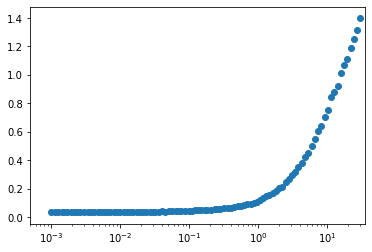

In [4]:
fig, ax = pyplot.subplots()

ax.scatter(data.x, data.y)
ax.set_xscale('log')
ax.set_xlim(0.0005, 35)
pyplot.show()

### Build error model
Next, we'll define an error model to describe the relationship between x and y.

In [5]:
class ODAbsorbanceErrorModel(calibr8.ErrorModel):
    def __init__(self):
        # set name of the independent variable to 'OD600'
        # set name of the dependent variable to 'A600'
        super().__init__('OD600', 'A600')
        
    def predict_dependent(self, x, *, theta=None):
        """Predicts the parameters mu and sigma of a student-t-distribution which characterises the dependent variable
           given values of the independent variable.

        Args:
            x (array): values of the independent variable
            theta: parameters describing the linear function of mu and the constant function of sigma (default to self.theta_fitted)

        Returns:
            mu, sigma, density (array): values for mu and sigma characterising the t distributions describing the dependent variable
        """
        if theta is None:
            theta = self.theta_fitted
        # TODO....
        mu = calibr8.asymmetric_logistic(x, theta)
        sigma = theta[5]
        df = theta[6]
        return mu, sigma, df
    
    def predict_independent(self, y):
        """Predict the most likely value of the independent variable using the Inverse 5-parameter asymmetric logistic model.

        Args:
            y (array): measurements of the dependent variable
            theta (array): parameters of the logistic model
                L_L: lower asymptote
                L_U: upper asymptote
                I_x: x-value at inflection point (v=1)
                k: growth rate
                v: symmetry parameter
                s: sigma
                df: degree of freedom
                
        Returns:
            mu (array): predicted independent variables given the observations
        """
        # TODO....
        return calibr8.inverse_asymmetric_logistic(y, self.theta_fitted)

    def loglikelihood(self, *, y,  x, theta=None):
        """Loglikelihood of observation (dependent variable) given the independent variable

        Args:
            y (array): measurements of the dependent variable
            x (array): predicted independent variables
            theta: parameters describing the models of mu, sigma and df
                   (to be fitted with data, otherwise theta=self.theta_fitted)
        
        Return:
            Sum of loglikelihoods
        """
        if theta is None:
            if self.theta_fitted is None:
                raise Exception('No parameter vector was provided and the model is not fitted with data yet.')
            theta = self.theta_fitted
        # TODO.....
        mu, sigma, df = self.predict_dependent(x, theta=theta)
        # using t-distributed error
        likelihoods = scipy.stats.t.pdf(x=y, df=df, loc=mu, scale=sigma)
        loglikelihoods = numpy.log(likelihoods)
        # (return drin lassen)
        return numpy.sum(loglikelihoods)

### Fitting the model
To fit the error model, we need:
1. x and y
2. initial guess of the model parameters
3. bounds of the model parameters

In [6]:
em = ODAbsorbanceErrorModel()

em.fit(independent=data.x, dependent=data.y,
       # TODO: fill in values, give hint to v
      theta_guessed=[-10, 1.5 , 0, 0.1, 4, 0.001, 1],
      bounds=[
          # TODO: bounds raus nehmen, aber Kommentare drin lassen
          (-20, -5),       # L_L   lower asymptote
          (0, 5),          # L_U   upper asymptote
          (-10, -1),       # I_x   x-value at inflection point (v=1)
          (0.01, 0.5),     # k     growth rate
          (1, 8),          # v     symmetry parameter
          (0.00005, 0.05), # scale (t-distribution)
          (0.1, 1),        # df    (t-distribution)
      ]
)

      fun: -409.31213502576406
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.67908717e-01, -7.37372829e-02, -1.91835170e-01, -2.38350140e-01,
       -1.57638169e-01, -1.07888809e-02, -2.27373675e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 4768
      nit: 423
   status: 0
  success: True
        x: array([-9.55550854e+00,  1.51541524e+00, -1.66613774e+00,  8.57571707e-02,
        4.34660934e+00,  9.18468363e-04,  8.52398465e-01])

### Visualizing

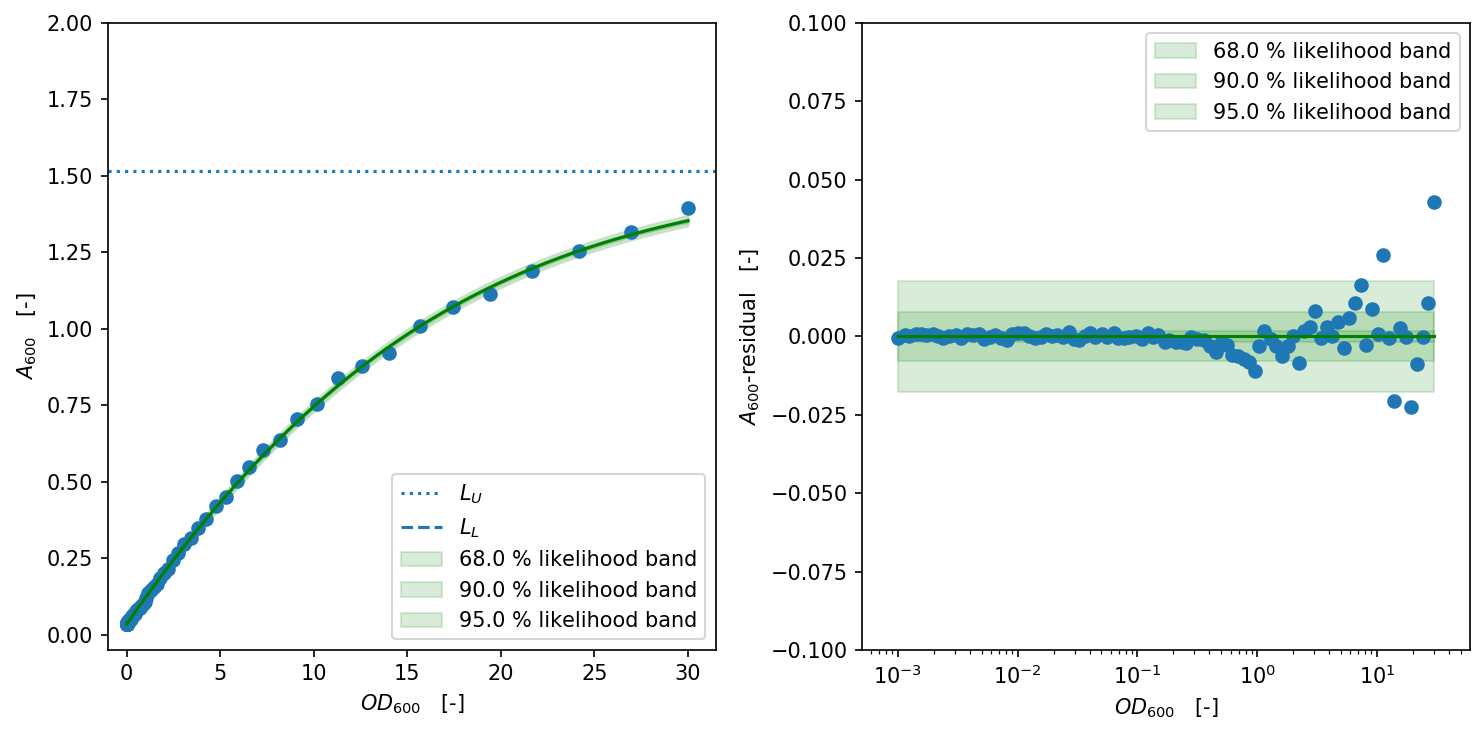

In [7]:
theta = em.theta_fitted
L_L, L_U, I_x, k, v, sigma, df = theta

fig, (left, right) = pyplot.subplots(ncols=2, dpi=150, figsize=(10,5))

x_dense = numpy.linspace(0.001, 30, 1000)
mu, sigma, df = em.predict_dependent(x_dense)

# Left diagramm
calibr8.utils.plot_t_band(left, x_dense, mu, sigma, df)
left.scatter(data.x, data.y, marker='o')

left.set_ylabel('$A_{600}$   [-]')
left.set_xlabel('$OD_{600}$   [-]')
left.set_xlim(-1, data.x.max()*1.05)
left.set_ylim(-0.05,2)
left.axhline(L_U, linestyle=':', label='$L_U$')
left.axhline(L_L, linestyle='--', label='$L_L$')
left.legend(loc='lower right')

# Right diagramm
mu, sigma, df = em.predict_dependent(data.x)
calibr8.utils.plot_t_band(right, data.x, numpy.zeros_like(data.x), sigma, df)
right.scatter(data.x, data.y-mu, marker='o')

right.set_ylabel('$A_{600}$-residual   [-]')
right.set_xlabel('$OD_{600}$   [-]')
right.set_xscale('log')
right.set_xlim(data.x.min()/2, data.x.max()*2)
right.set_ylim(-0.1, 0.1)
right.legend()

pyplot.tight_layout()
pyplot.show()

In [8]:
em.predict_independent(0.8)

11.019766272501945

In [9]:
em.predict_independent([0.5, 0.8, 1.2])

array([ 5.97827333, 11.01976627, 21.78261907])